In [6]:
?rm

search: rm rmprocs varm norm permute! normpath Hermitian permutedims



```
rm(path::AbstractString; recursive=false)
```

Delete the file, link, or empty directory at the given path. If `recursive=true` is passed and the path is a directory, then all contents are removed recursively.


In [1]:
include("jl/init_default.jl");

22-פבר 14:03:19:INFO:root:N=74293025 min(m)=46.538624 max(m)=959026.75
22-פבר 14:03:19:INFO:root:rescaling masses
22-פבר 14:03:20:INFO:root:N=74293025 min(m)=50.036606 max(m)=1.0311101e6


In [2]:
include("jl/all.jl")
pop_posv()

In [3]:
opos_i = SharedArray(Float32, size(pos));

In [5]:
#copy_into!(opos_i, pos);
opos_i.s[:,:] = SIDE_LEN*rand(Float32, size(opos_i));

In [6]:
#back_optimize_zeld_vs_pushed_pos!(rho, opos_i, pos, m, 0.01, 1.0, 20, 0.27, 250);
optimize_zeld_vs_pushed_pos!(rho, opos_i, pos, m, 0.01, 1.0, 0.27, 400);

22-פבר 14:04:01:INFO:root:optzel start a_from=0.01 a_to=1.0 end_meandx=400 fracmov=0.27
22-פבר 14:04:01:INFO:root:simzel start from a=0.01 to a=1.0
22-פבר 14:04:28:INFO:root:simzel dim 1
22-פבר 14:04:43:INFO:root:simzel dim 2
22-פבר 14:04:57:INFO:root:simzel dim 3
22-פבר 14:05:14:INFO:root:simzel end
22-פבר 14:05:15:INFO:root:optzel step=1 mdx=399964.28
22-פבר 14:05:22:INFO:root:simzel start from a=0.01 to a=1.0
22-פבר 14:05:48:INFO:root:simzel dim 1
22-פבר 14:06:02:INFO:root:simzel dim 2
22-פבר 14:06:16:INFO:root:simzel dim 3
22-פבר 14:06:31:INFO:root:simzel end
22-פבר 14:06:32:INFO:root:optzel step=2 mdx=291987.22
22-פבר 14:06:38:INFO:root:simzel start from a=0.01 to a=1.0
22-פבר 14:07:05:INFO:root:simzel dim 1
22-פבר 14:07:20:INFO:root:simzel dim 2
22-פבר 14:07:34:INFO:root:simzel dim 3
22-פבר 14:07:51:INFO:root:simzel end
22-פבר 14:07:51:INFO:root:optzel step=3 mdx=213155.94
22-פבר 14:07:56:INFO:root:simzel start from a=0.01 to a=1.0
22-פבר 14:08:22:INFO:root:simzel dim 1
22-פבר 14

In [7]:
mean_std_dx_vs_pushed_pos(opos_i)

(3152.7021f0,2415.4043f0)

In [8]:
pop_posv();

In [9]:
kd = get_kd(pos);

In [10]:
to_rho!(opos_i,m, rho);
rho_to_1st_order_vel_pot!(rho);

In [11]:
get_1st_order_comoving_vel!(c, 0.01, 1, pos, rho);
get_slope_std_smoothed(kd, real(c), _s_vx, _s_pos, 10000.0, 100000)

(0.09772830066664748,93.52502420904088)

In [12]:
to_rho!(opos_i,m, rho);

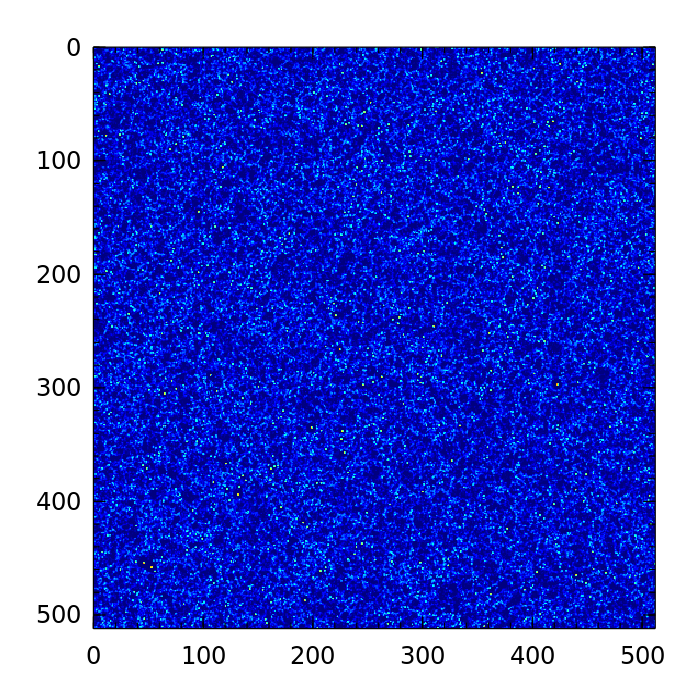

In [13]:
imrho = real(rho[:,:,254]) + real(rho[:,:,255]) + real(rho[:,:,256])
Winston.set_default_plot_size(700,700)
imagesc(log10(1e-8+imrho))

In [14]:
to_delta!(rho);

In [15]:
corr = get_correlation(rho);

In [16]:
pop_posv()
to_rho!(pos,m, rho);
to_delta!(rho)
corr_org = get_correlation(rho);

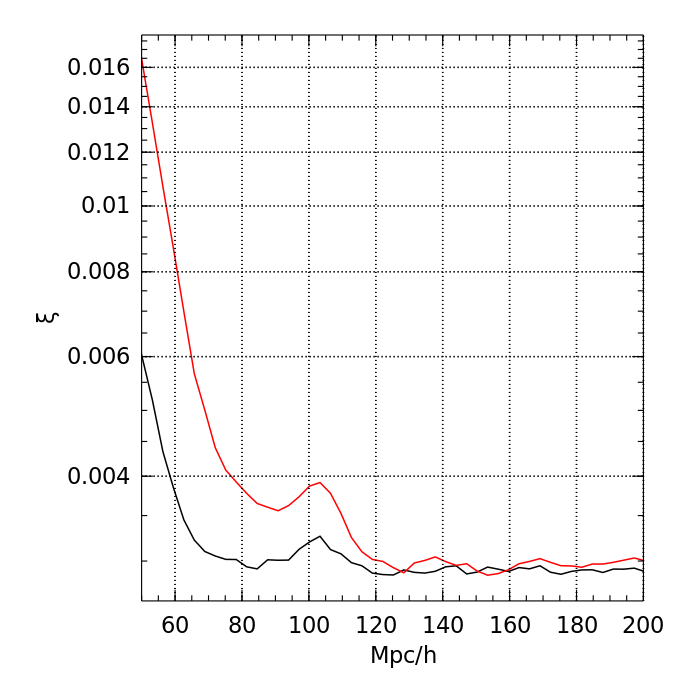

In [17]:
semilogy(xl/1000, corr*1.5)
hold(true)
semilogy(xl/1000, corr_org, "red")
hold(false)
xlim(50,200)
grid(true)
xlabel("Mpc/h")
ylabel("\\xi")